In [1]:
import torch

from sbi import inference
from sbi import simulators
from sbi import utils

from matplotlib import pyplot as plt

# use GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")


# SRE

In [2]:
# get simulator and prior
simulator, prior, ground_truth_parameters, true_observation = simulators.get_simulator_prior_and_groundtruth("lotka-volterra")

# get classifier
classifier = utils.get_classifier(
    "resnet",
    parameter_dim=simulator.parameter_dim,
    observation_dim=simulator.observation_dim,
)

# create inference method
inference_method = inference.SRE(
    simulator=simulator,
    prior=prior,
    true_observation=true_observation,
    classifier=classifier,
    mcmc_method="slice-np",
)

In [4]:
# run inference
inference_method.run_inference(num_rounds=1, num_simulations_per_round=1000)

# sample posterior
samples = inference_method.sample_posterior(num_samples=1000)




100%|██████████| 1/1 [01:36<00:00, 96.34s/it]

Generating samples: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

Generating samples: 100%|██████████| 1000/1000 [04:17<00:00,  3.88it/s]


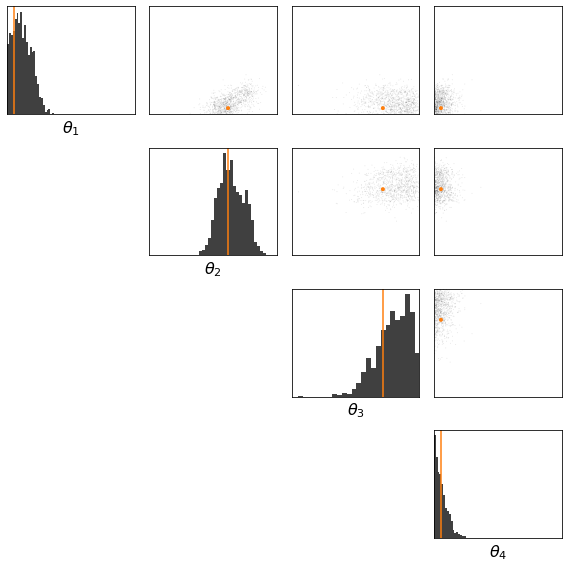

In [5]:
# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(ground_truth_parameters).reshape(
        -1
    ),
)
plt.show()